In [2]:
#import the necessary liblaries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


#warnings.filterwarnings('ignore')
%matplotlib inline
# Tensorflow and Keras Modules
import tensorflow as tf
from keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import keras

In [3]:
image_paths = []
age_labels = []
gender_labels = []

In [4]:
for filename in (os.listdir('archive/UTKFace/')):
    image_path = os.path.join('archive/UTKFace/', filename)
    temp = filename.split('_')
    #get age from 0
    age = int(temp[0])
    #get gender from 1
    gender = int(temp[1])
    #append all
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

In [5]:
image_paths

['archive/UTKFace/9_1_2_20161219204347420.jpg.chip.jpg',
 'archive/UTKFace/36_0_1_20170117163203851.jpg.chip.jpg',
 'archive/UTKFace/86_1_0_20170120225751953.jpg.chip.jpg',
 'archive/UTKFace/26_1_0_20170116171048641.jpg.chip.jpg',
 'archive/UTKFace/1_1_2_20161219154612988.jpg.chip.jpg',
 'archive/UTKFace/52_0_1_20170117161018159.jpg.chip.jpg',
 'archive/UTKFace/25_1_0_20170117134403373.jpg.chip.jpg',
 'archive/UTKFace/16_0_0_20170104003740977.jpg.chip.jpg',
 'archive/UTKFace/27_0_3_20170119210058457.jpg.chip.jpg',
 'archive/UTKFace/36_0_3_20170119180245724.jpg.chip.jpg',
 'archive/UTKFace/58_0_2_20170116193704928.jpg.chip.jpg',
 'archive/UTKFace/6_1_0_20170114024512634.jpg.chip.jpg',
 'archive/UTKFace/35_1_2_20170116185947151.jpg.chip.jpg',
 'archive/UTKFace/1_1_3_20161219230734016.jpg.chip.jpg',
 'archive/UTKFace/26_1_1_20170103181931657.jpg.chip.jpg',
 'archive/UTKFace/2_0_2_20161219141650121.jpg.chip.jpg',
 'archive/UTKFace/53_1_0_20170110143534851.jpg.chip.jpg',
 'archive/UTKFace/3

In [6]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,archive/UTKFace/9_1_2_20161219204347420.jpg.ch...,9,1
1,archive/UTKFace/36_0_1_20170117163203851.jpg.c...,36,0
2,archive/UTKFace/86_1_0_20170120225751953.jpg.c...,86,1
3,archive/UTKFace/26_1_0_20170116171048641.jpg.c...,26,1
4,archive/UTKFace/1_1_2_20161219154612988.jpg.ch...,1,1


In [7]:
df['sexe'] = df['gender'].map({0: 'Homme', 1: 'Femme'})
df

,image,age,gender,sexe
0,archive/UTKFace/9_1_2_20161219204347420.jpg.ch...,9,1,Femme
1,archive/UTKFace/36_0_1_20170117163203851.jpg.c...,36,0,Homme
2,archive/UTKFace/86_1_0_20170120225751953.jpg.c...,86,1,Femme
3,archive/UTKFace/26_1_0_20170116171048641.jpg.c...,26,1,Femme
4,archive/UTKFace/1_1_2_20161219154612988.jpg.ch...,1,1,Femme
...,...,...,...,...
23703,archive/UTKFace/35_0_0_20170117155112202.jpg.c...,35,0,Homme
23704,archive/UTKFace/52_0_3_20170119200211340.jpg.c...,52,0,Homme
23705,archive/UTKFace/26_0_1_20170116010114628.jpg.c...,26,0,Homme
23706,archive/UTKFace/28_0_1_20170117015458481.jpg.c...,28,0,Homme


In [8]:
df.describe()

,age,gender
count,23708.000000,23708.000000
mean,33.303484,0.477349
std,19.886112,0.499497
min,1.000000,0.000000
25%,23.000000,0.000000
50%,29.000000,0.000000
75%,45.000000,1.000000
max,116.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   23708 non-null  object
 1   age     23708 non-null  int64 
 2   gender  23708 non-null  int64 
 3   sexe    23708 non-null  object
dtypes: int64(2), object(2)
memory usage: 741.0+ KB


In [10]:
df.drop('gender', axis=1, inplace=True)

<Axes: xlabel='age', ylabel='Count'>

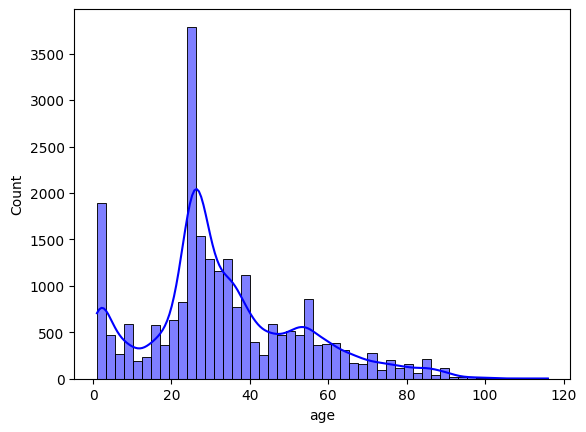

In [11]:
#check the age distribution
sns.histplot(df['age'], kde=True, bins=50, color='blue')

<Axes: xlabel='sexe', ylabel='age'>

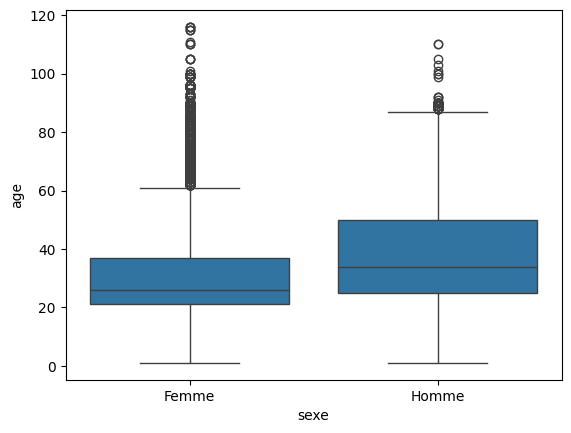

In [12]:
sns.boxplot(x='sexe', y='age', data=df)

<Axes: xlabel='sexe', ylabel='age'>

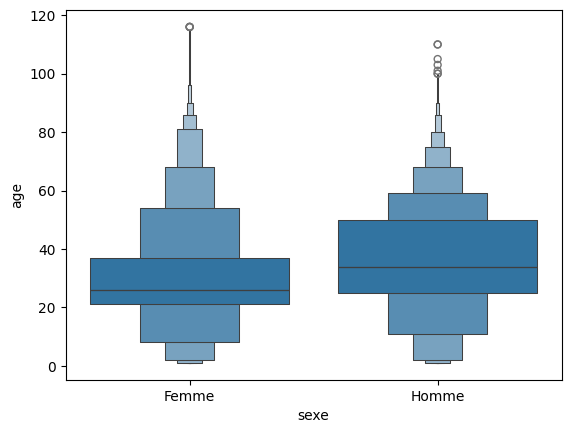

In [13]:
sns.boxenplot(x='sexe', y='age', data=df)

<Axes: xlabel='sexe', ylabel='count'>

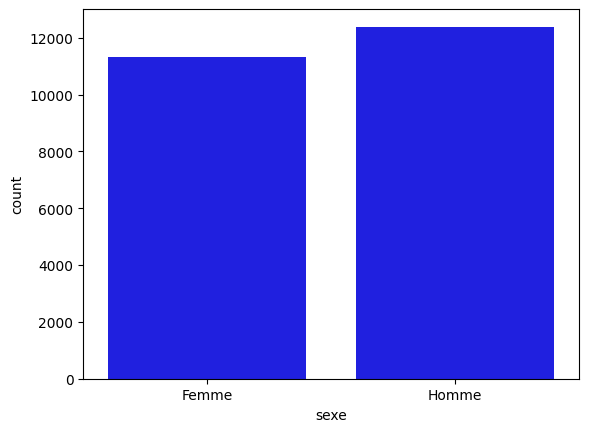

In [14]:
sns.countplot(x='sexe', data=df, color='blue')

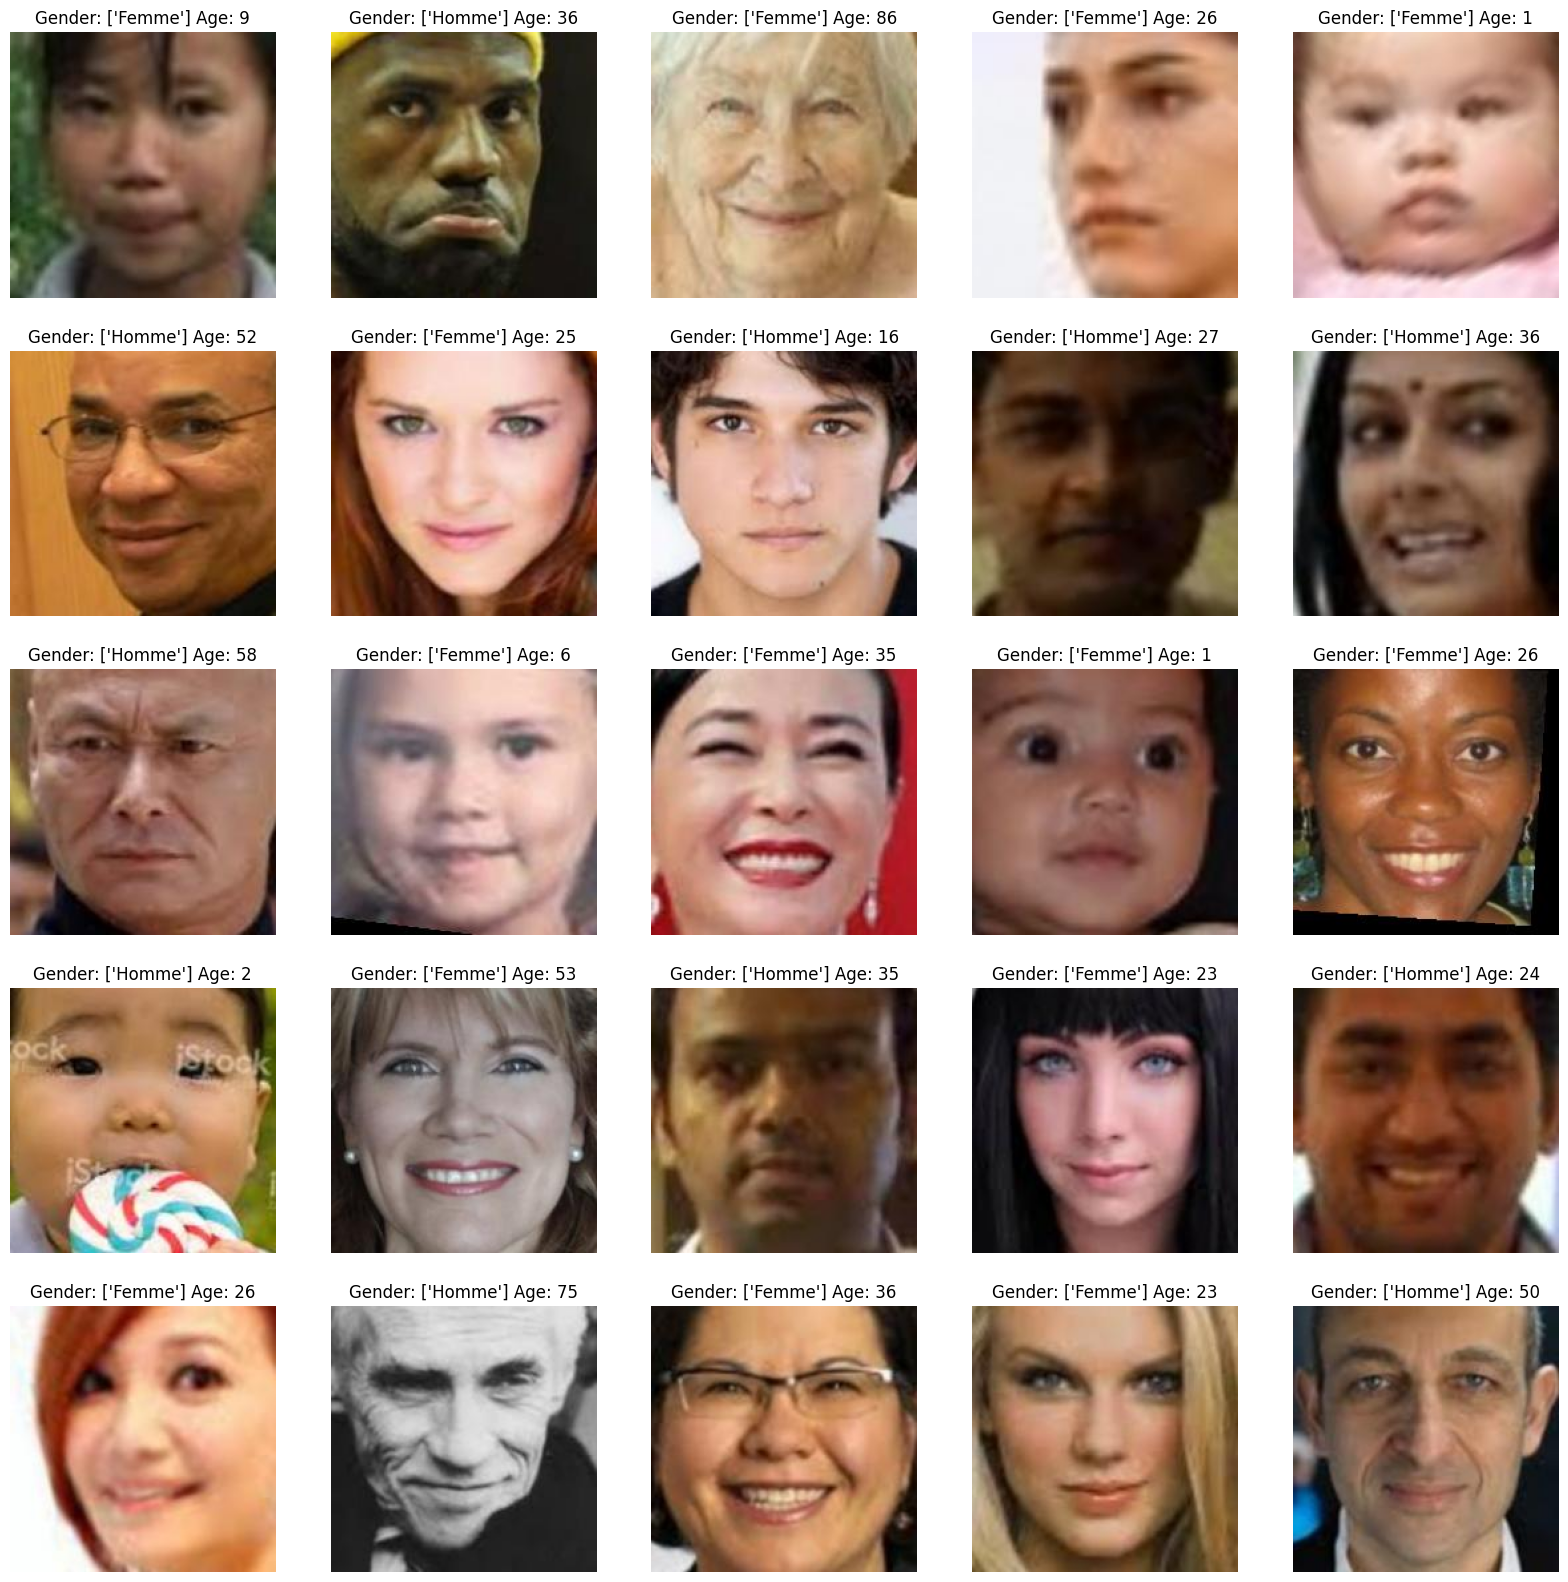

In [15]:
#show some examples
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, sexe in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Gender: {[sexe]} Age: {age}")
    plt.axis('off')

In [19]:
from PIL import Image
def extract_features(images):
    features = []
    for image in images:
        # change to gray image
        img = load_img(image, color_mode='grayscale')
        #resize by 128*128
        img = img.resize((128, 128), Image.LANCZOS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128,1 )

    return features

In [20]:
X = extract_features(df['image'])
X.shape

(23708, 128, 128, 1)

In [21]:
X = X/255.0

In [22]:
y_gender = np.array(df['sexe'])
y_age = np.array(df['age'])

y_age
y_gender

array(['Femme', 'Homme', 'Femme', ..., 'Homme', 'Homme', 'Femme'],
      dtype=object)

In [25]:
#Create Model
input_shape = (128, 128, 1)
# declare input
inputs = Input((input_shape))
# Convolutional layers 1
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
# Convolutional layers 2
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
# Convolutional layers 3
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
# Convolutional layers 4
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)


flatten = Flatten() (maxp_4)

# Fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

# two outputs
output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

In [ ]:
from tensorflow.keras.utils import plot_model
keras.utils.model_to_dot(
    model,
    show_shapes=True,
    show_dtype=True,
    rankdir="TB",
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,
)

ImportError: You must install pydot (`pip install pydot`) for model_to_dot to work.

In [26]:
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30


In [ ]:
model.save("gender_age_detection_model.keras")
